In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dinamostafaosman","key":"53daa11b69d3fe5926c4fcbe4ac61781"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
! kaggle datasets list

401 - Unauthorized - Unauthenticated


In [7]:
!kaggle datasets download -d ananthu017/emotion-detection-fer


 91% 59.0M/65.2M [00:00<00:00, 217MB/s]
100% 65.2M/65.2M [00:00<00:00, 210MB/s]


In [8]:
import zipfile

# Path to the zip file
zip_file_path = "/content/emotion-detection-fer.zip"

# Directory where you want to extract the contents
extract_dir = "emotion-detection-fer"

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(extract_dir)


In [9]:
# path of the train and the test data
TRAIN_DATA_PATH = '/content/emotion-detection-fer/train'
TEST_DATA_PATH = '/content/emotion-detection-fer/test'


In [10]:
import os

# Function to count the number of images in a directory
def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                count += 1
    return count

In [11]:
# directories for the whole data and both train and test data
dataset_dir = "/content/emotion-detection-fer"
train_dir = '/content/emotion-detection-fer/train'
test_dir = '/content/emotion-detection-fer/test'

In [12]:
def len_emoji(data_dir):
  freq_emoji = {}
  for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    freq_emoji[folder_name] = count_images(folder_path)
  return freq_emoji


In [13]:
# Get the number of images in each  folder
train_counts = len_emoji(train_dir)
test_counts = len_emoji(test_dir)


In [14]:
# Print the results
len_train, len_test = 0, 0
print("Number of images in train folder:")
for folder, count in train_counts.items():
    len_train += count
    print(f"{folder}: {count}")
    print(f'\n\nTotal images in train set : {len_train}')
train_counts['Length'] = len_train

print('--------------------------------------------------------')
print("\nNumber of images in test folder:")
for folder, count in test_counts.items():
    len_test += count
    print(f"{folder}: {count}")
    print(f'\n\nTotal images in test set : {len_test}')
test_counts['Length'] = len_test


Number of images in train folder:
happy: 7215


Total images in train set : 7215
fearful: 4097


Total images in train set : 11312
sad: 4830


Total images in train set : 16142
angry: 3995


Total images in train set : 20137
neutral: 4965


Total images in train set : 25102
surprised: 3171


Total images in train set : 28273
disgusted: 436


Total images in train set : 28709
--------------------------------------------------------

Number of images in test folder:
happy: 1774


Total images in test set : 1774
fearful: 1024


Total images in test set : 2798
sad: 1247


Total images in test set : 4045
angry: 958


Total images in test set : 5003
neutral: 1233


Total images in test set : 6236
surprised: 831


Total images in test set : 7067
disgusted: 111


Total images in test set : 7178


In [15]:
import pandas as pd
train_counts_df = pd.DataFrame(train_counts, index=['train'])
train_counts_df

,happy,fearful,sad,angry,neutral,surprised,disgusted,Length
train,7215,4097,4830,3995,4965,3171,436,28709


In [16]:
test_counts_df = pd.DataFrame(test_counts, index=['test'])
test_counts_df

,happy,fearful,sad,angry,neutral,surprised,disgusted,Length
test,1774,1024,1247,958,1233,831,111,7178


In [17]:
data_emoji = {'train': train_counts, 'test':test_counts}
df = pd.DataFrame(data_emoji)
df

,train,test
happy,7215,1774
fearful,4097,1024
sad,4830,1247
angry,3995,958
neutral,4965,1233
surprised,3171,831
disgusted,436,111
Length,28709,7178


In [18]:

# Extract keys and values from the dictionary
keys_train = list(train_counts.keys())
keys_test = list(test_counts.keys())
values_train = list(train_counts.values())
values_test = list(test_counts.values())





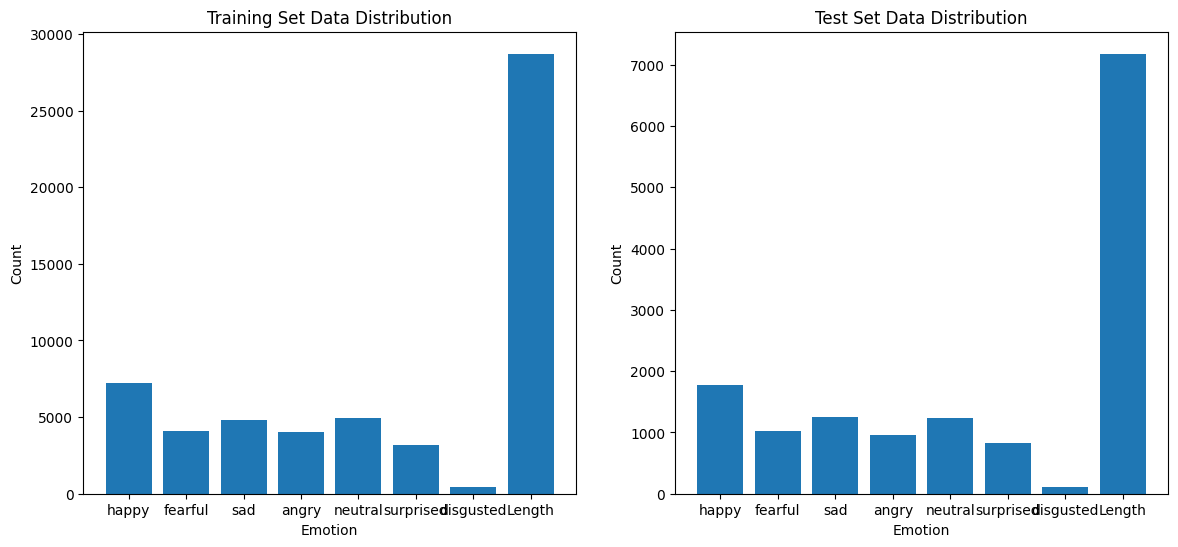

In [19]:
import matplotlib.pyplot as plt
# Plotting data distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.bar(keys_train, values_train)
plt.title('Training Set Data Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
plt.bar(keys_test, values_test)
plt.title('Test Set Data Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

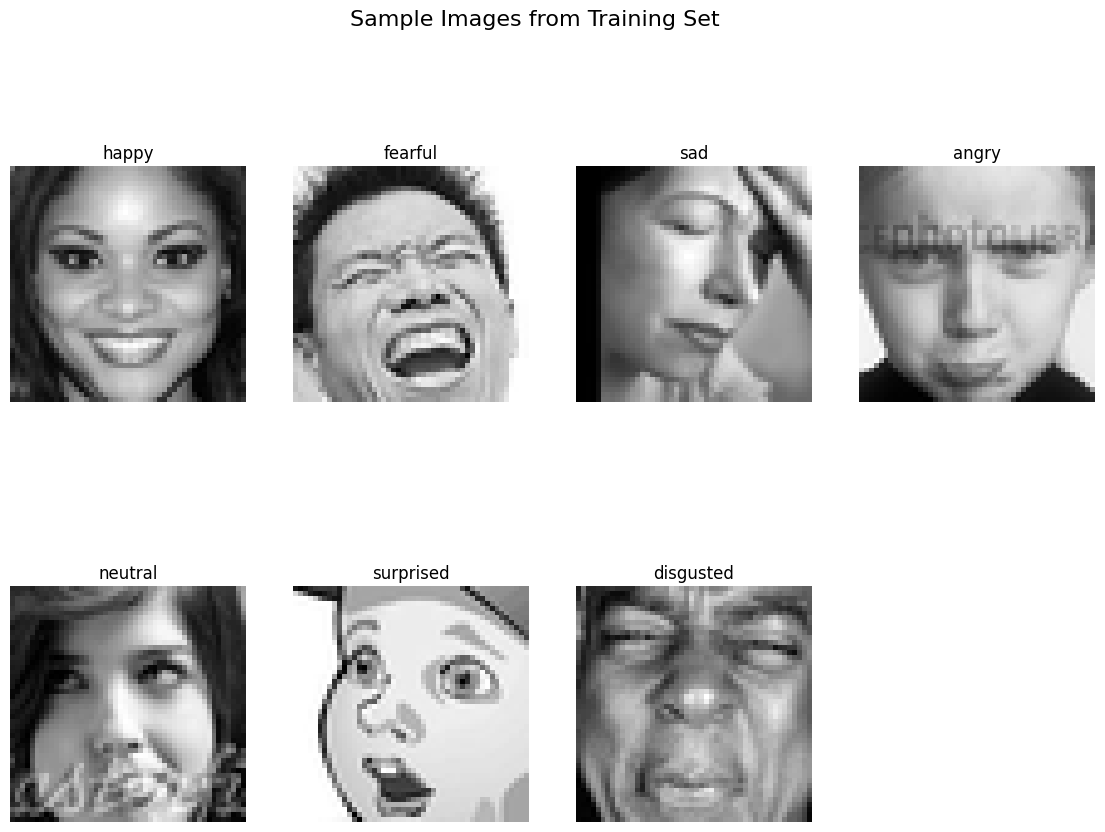

In [20]:
# Plotting sample images from each class
plt.figure(figsize=(14, 10))
for i, expression in enumerate(os.listdir(train_dir), 1):
    img_path = os.path.join(train_dir, expression, os.listdir(os.path.join(train_dir, expression))[0])
    img = plt.imread(img_path)
    plt.subplot(2, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(expression)
    plt.axis('off')
plt.suptitle('Sample Images from Training Set', fontsize=16)
plt.show()

In [21]:
from keras.preprocessing.image import ImageDataGenerator
# Define image data generators for train and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for test data

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical',  # Use categorical labels
    color_mode='grayscale',  # Load images as grayscale
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical',  # Use categorical labels
    color_mode='grayscale',  # Load images as grayscale
    shuffle=False  # No shuffling for test data
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [23]:

IMAGE_SIZE = (150, 150, 1)
BATCH_SIZE = 32
NUM_CLASSES = 7
EPOCHS = 100

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=IMAGE_SIZE),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')  # 7 output classes for 7 emotions
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [26]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,

)


Epoch 1/100
898/898 [==============================] - 85s 87ms/step - loss: 1.8105 - accuracy: 0.2455 - val_loss: 1.7617 - val_accuracy: 0.2581
Epoch 2/100
898/898 [==============================] - 74s 82ms/step - loss: 1.7826 - accuracy: 0.2578 - val_loss: 1.7314 - val_accuracy: 0.2873
Epoch 3/100
898/898 [==============================] - 75s 83ms/step - loss: 1.7645 - accuracy: 0.2699 - val_loss: 1.6979 - val_accuracy: 0.3164
Epoch 4/100
898/898 [==============================] - 74s 83ms/step - loss: 1.7379 - accuracy: 0.2870 - val_loss: 1.6328 - val_accuracy: 0.3461
Epoch 5/100
898/898 [==============================] - 77s 85ms/step - loss: 1.6931 - accuracy: 0.3180 - val_loss: 1.6088 - val_accuracy: 0.3466
Epoch 6/100
898/898 [==============================] - 74s 83ms/step - loss: 1.6471 - accuracy: 0.3426 - val_loss: 1.5550 - val_accuracy: 0.4050
Epoch 7/100
898/898 [==============================] - 74s 83ms/step - loss: 1.5994 - accuracy: 0.3690 - val_loss: 1.4683 - val_ac

In [27]:
# evaluation
evaluation = model.evaluate(test_generator)
print(f"\nTest Accuracy: {evaluation[1] * 100:.2f}%")


225/225 [==============================] - 4s 16ms/step - loss: 1.1775 - accuracy: 0.5442

Test Accuracy: 54.42%


In [28]:
# Confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

225/225 [==============================] - 4s 17ms/step


In [29]:
conf_matrix = confusion_matrix(test_generator.classes, y_pred)

In [30]:
# Classification report
class_labels = list(test_generator.class_indices.keys())
print("\nClassification Report:\n", classification_report(test_generator.classes, y_pred, target_names=class_labels))


Classification Report:
               precision    recall  f1-score   support

       angry       0.39      0.47      0.43       958
   disgusted       0.50      0.01      0.02       111
     fearful       0.37      0.13      0.20      1024
       happy       0.73      0.83      0.78      1774
     neutral       0.53      0.51      0.52      1233
         sad       0.39      0.53      0.45      1247
   surprised       0.73      0.67      0.70       831

    accuracy                           0.54      7178
   macro avg       0.52      0.45      0.44      7178
weighted avg       0.54      0.54      0.53      7178



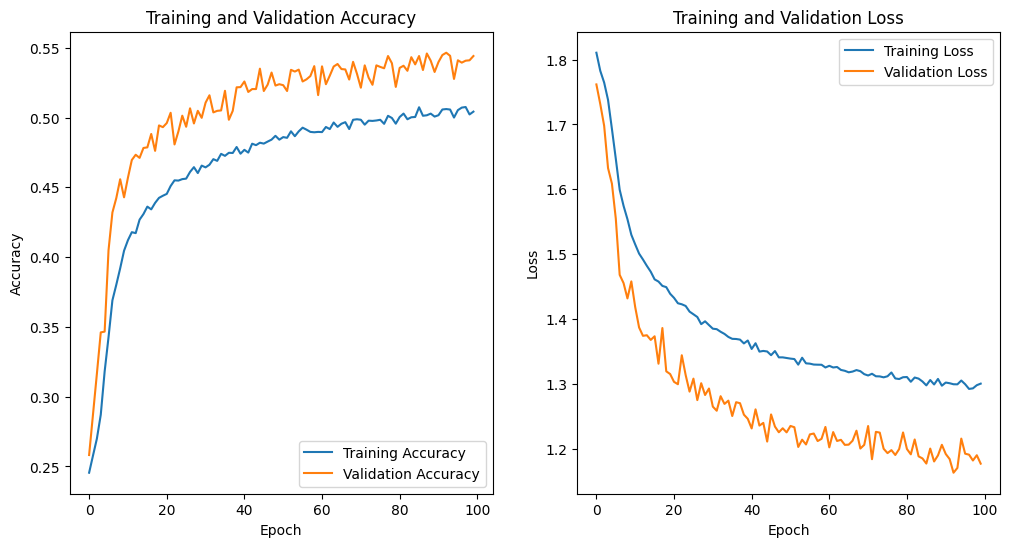

In [31]:
# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


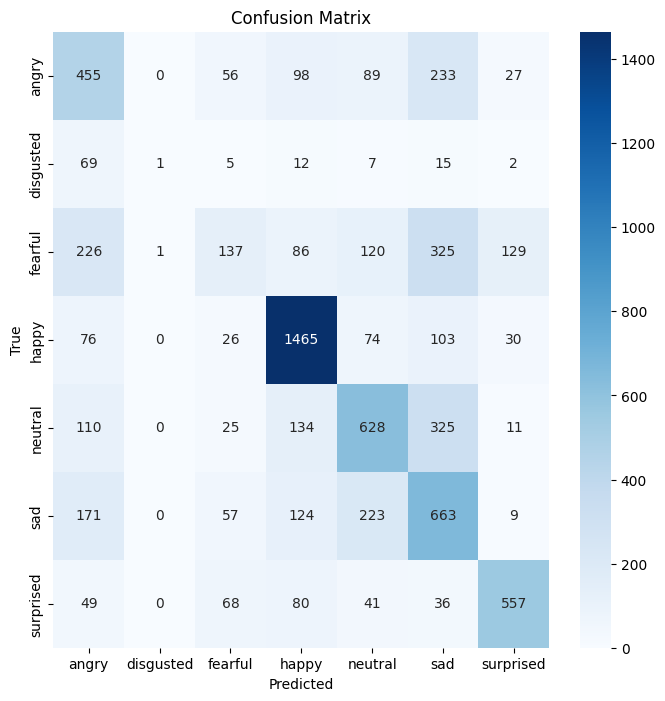

In [32]:
import seaborn as sns
# Confusion matrix visualization
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


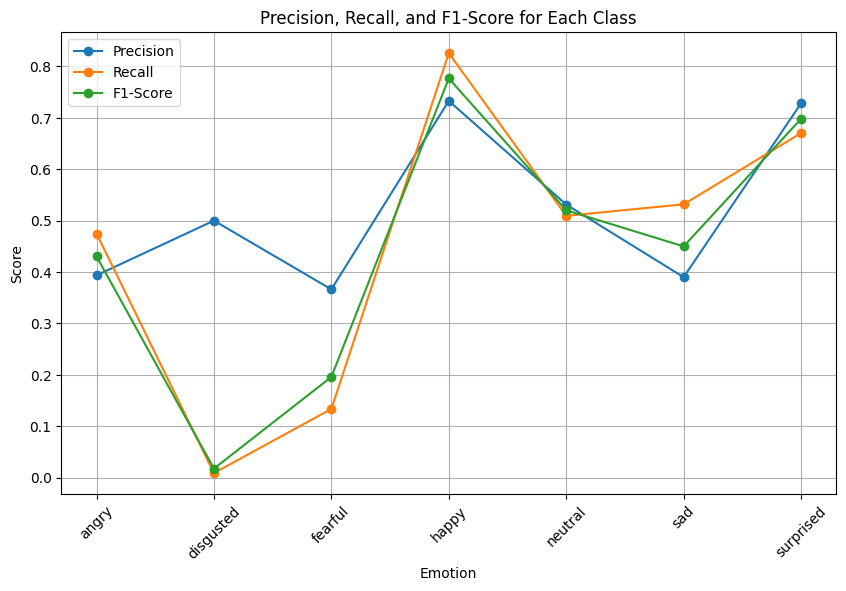

In [33]:
# Plotting precision, recall, and F1-score for each class
metrics = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
precision = [metrics[label]['precision'] for label in class_labels]
recall = [metrics[label]['recall'] for label in class_labels]
f1_score = [metrics[label]['f1-score'] for label in class_labels]

plt.figure(figsize=(10, 6))
plt.plot(class_labels, precision, marker='o', label='Precision')
plt.plot(class_labels, recall, marker='o', label='Recall')
plt.plot(class_labels, f1_score, marker='o', label='F1-Score')
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.xlabel('Emotion')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()